In [5]:
pip install pydotplus

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [7]:
## import dependencies
from sklearn import tree
import pandas as pd
import pydotplus # To create our Decision Tree Graph
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from IPython.display import Image  # To Display a image of our graph

In [8]:
ground_df = pd.read_csv('ukCo2Emissions.csv')
ground_df

,Region,Greenhouse gas,CalendarYear,CO2_emissions_kt CO2e,CO2Level,HelthLevel
0,UK,CO2,2005,0.380289,High,Bad
1,UK,CO2,2006,0.385347,High,Bad
2,UK,CO2,2007,0.375697,High,Bad
3,UK,CO2,2008,0.380823,High,Bad
4,UK,CO2,2009,0.333440,High,Bad
5,UK,CO2,2010,0.349909,High,Bad
6,UK,CO2,2011,0.321024,High,Bad
7,UK,CO2,2012,0.306102,High,Bad
8,UK,CO2,2013,0.319948,High,Bad
9,UK,CO2,2014,0.211192,Low,Good


In [9]:
g_df = pd.read_csv('ukCo2Emissions.csv')
dataset = g_df.iloc[:, 0:5].values
dataset

array([['UK', 'CO2', 2005, 0.380289221, 'High'],
       ['UK', 'CO2', 2006, 0.385346824, 'High'],
       ['UK', 'CO2', 2007, 0.375696872, 'High'],
       ['UK', 'CO2', 2008, 0.38082293, 'High'],
       ['UK', 'CO2', 2009, 0.333440072, 'High'],
       ['UK', 'CO2', 2010, 0.349909021, 'High'],
       ['UK', 'CO2', 2011, 0.321023521, 'High'],
       ['UK', 'CO2', 2012, 0.306101863, 'High'],
       ['UK', 'CO2', 2013, 0.319947604, 'High'],
       ['UK', 'CO2', 2014, 0.21119181, 'Low'],
       ['UK', 'CO2', 2015, 0.216906318, 'Low'],
       ['UK', 'CO2', 2016, 0.191064502, 'Low'],
       ['UK', 'CO2', 2017, 0.17001854, 'Low'],
       ['UK', 'CO2', 2018, 0.158431799, 'Low'],
       ['UK', 'CO2', 2019, 0.127619213, 'Low'],
       ['UK', 'CO2', 2020, 0.105892479, 'Low']], dtype=object)

In [12]:
cch_data = g_df[['Region', 'Greenhouse gas','CalendarYear','CO2_emissions_kt CO2e', 'CO2Level', 'HelthLevel']]
cch_data

,Region,Greenhouse gas,CalendarYear,CO2_emissions_kt CO2e,CO2Level,HelthLevel
0,UK,CO2,2005,0.380289,High,Bad
1,UK,CO2,2006,0.385347,High,Bad
2,UK,CO2,2007,0.375697,High,Bad
3,UK,CO2,2008,0.380823,High,Bad
4,UK,CO2,2009,0.333440,High,Bad
5,UK,CO2,2010,0.349909,High,Bad
6,UK,CO2,2011,0.321024,High,Bad
7,UK,CO2,2012,0.306102,High,Bad
8,UK,CO2,2013,0.319948,High,Bad
9,UK,CO2,2014,0.211192,Low,Good


In [13]:
one_hot_data = pd.get_dummies(cch_data)
one_hot_data

,CalendarYear,CO2_emissions_kt CO2e,Region_UK,Greenhouse gas_CO2,CO2Level_High,CO2Level_Low,HelthLevel_Bad,HelthLevel_Good
0,2005,0.380289,1,1,1,0,1,0
1,2006,0.385347,1,1,1,0,1,0
2,2007,0.375697,1,1,1,0,1,0
3,2008,0.380823,1,1,1,0,1,0
4,2009,0.333440,1,1,1,0,1,0
5,2010,0.349909,1,1,1,0,1,0
6,2011,0.321024,1,1,1,0,1,0
7,2012,0.306102,1,1,1,0,1,0
8,2013,0.319948,1,1,1,0,1,0
9,2014,0.211192,1,1,0,1,0,1


In [14]:
clf = tree.DecisionTreeClassifier()
clf_train = clf.fit(one_hot_data, cch_data ['CO2Level'])
clf_train = clf.fit(one_hot_data, cch_data ['HelthLevel'])

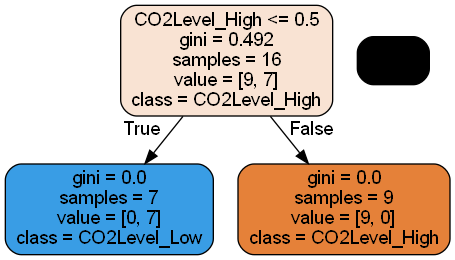

In [18]:
dot_data = tree.export_graphviz(clf_train, out_file=None, feature_names=list(one_hot_data.columns.values), 
                                class_names=['CO2Level_High', 'CO2Level_Low', 'HelthLevel_Bad', 'HelthLevel_Good'],
                                rounded=True, filled=True)

graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())